<h1 style="text-align: center;">Partial Fraction Expansion</h1>
<p style="text-align: center;">Lab 6</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Use **scipy.signal.residue()** to perform partial fraction expansion. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Plot for the step response from the prelab for **Task 1**.  
[ ] Plot for the step response using **scipy.signal.step()** for **Task 2**.  
[ ] Printed output for the partial fraction expansion for **Task 3**
  
##### Part 2
[ ] Printed output for the partial fraction expansion for **Task 1**
[ ] Plot for the response using the **Cosine Method** for **Task 2**.  
[ ] Plot the response using **scipy.signal.step()** for **Task 3**  

### 3. Part 1
##### 3.1 Purpose
To plot the step response of your prelab results and then use the **scipy.signal.residue()** function to perform partial fraction expansion on the S-domain system found in the prelab.  
##### 3.2 Tasks   
1. Plot the step response $y(t)$ that you found by hand in the prelab assignment from $0 \le t \le 2$ s.

In [20]:
# Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [21]:
# Insert your step function from previous labs here
def step(t):
    """
    Creates a step function for duration t
    (taken from lab 2)
    
    Inputs:     t - time vector for determining the response
    Outputs:    return - step function based on the time vector
    """
    return np.array([1 if t[i] >= 0 else 0 for i in range(len(t))])

In [22]:
# Insert code creating your prelab response and plotting that response here
def prelabFunc(t):
    """
    Takes the equation y''(t) + 10y'(t) + 24y(t) = x''(t) + 6x'(t) + 12x(t)
    Which was solved to be the transfer function: H(s) = (s**2 + 6s + 12)/(s**2 + 10s + 24)
    And turned back into the time domain to be: y(t) = (0.5 + e**-6t - 0.5e**-4t)*u(t)

    INPUTS:     t - time vector
    OUTPUTS:    y - time domain function from the original given equation
    """
    y = (0.5 + np.exp(-6*t) - 0.5*np.exp(-4*t))*step(t)


2. Using the $H(s)$ that you found in the prelab, plot the step response using the **scipy.signal.step()** command. *Note: The plots from Tasks 1 and 2 should be identical.* 

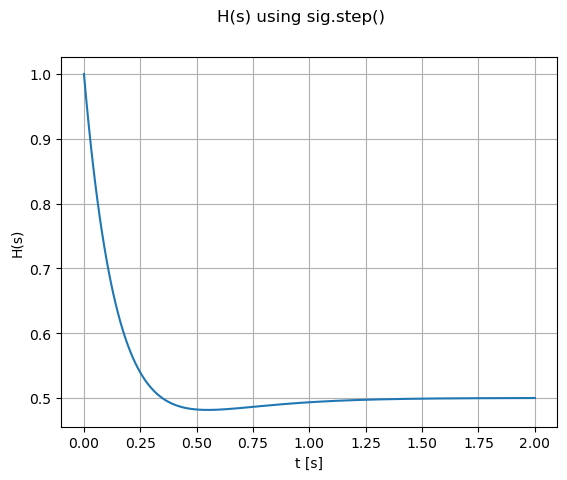

In [23]:
# Insert code creating and plotting the step response using scipy.signal.step() here
steps = 1e-2
t = np.arange(0, 2+steps, steps)

#create the H(s) parts numerator (num) and denominator (den)
num = [1, 6, 12]
den = [1, 10, 24]

tout, yout = sig.step((num, den), T = t)

#plot sig.step
plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("H(s) using sig.step()")
plt.show()


3. Entering $Y(s)$ (i.e. $Y(s) = H(s)X(s)$) from the prelab into **scipy.signal.residue()**, print the partial fraction expansion results R, P, and K. Compare this expression with the partial fraction expansion results derived by hand in the prelab and check that they agree. *Note: You can look up how to use the **scipy.signal.residue()** function in the scipy.signal documentation. The den array used in the **scipy.signal.residue()** function will **not** be the same as the one used in the **scipy.signal.step()** function in Task 2.*

In [24]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
#create the H(s) parts numerator (num) and denominator (den)
num = [1, 6, 12]
den = [1, 10, 24, 0] 
#run sig.residue and print results
res, pol, k = sig.residue(num, den)
print("Residue: ", res, "\nPoles: ", pol, "\nCoefficient: ", k)

Residue:  [ 0.5 -0.5  1. ] 
Poles:  [ 0. -4. -6.] 
Coefficient:  []


### 4. Part 2
##### 4.1 Purpose
Use **scipy.signal.residue()** to perform partial fraction expansion on a function that would be difficult to analyze by hand.
##### 4.2 Tasks   
A system is described by: $$y^{(5)}(t) + 18y^{(4)}(t) + 218y^{(3)}(t) + 2036y^{(2)}(t) + 9085y^{(1)}(t) + 25250y(t) = 25250x(t)$$  
1. For the system described above, use **scipy.signal.residue()** to find the partial fraction expansion of the step response and print the results R, P, and K.

In [46]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
num = [25250]
den = [1, 18, 218, 2036, 9085, 25250, 0]

#run sig.residue and print results
res, pol, k = sig.residue(num, den)
print("Residue: ", res, "\nPoles: ", pol, "\nCoefficient: ", k)

Residue:  [ 1.        +0.j         -0.48557692+0.72836538j -0.48557692-0.72836538j
 -0.21461963+0.j          0.09288674-0.04765193j  0.09288674+0.04765193j] 
Poles:  [  0. +0.j  -3. +4.j  -3. -4.j -10. +0.j  -1.+10.j  -1.-10.j] 
Coefficient:  []


2. Using the results from **Part 2, Task 1**, plot the time-domain response from $0 \le t \le 4.5$ s using the cosine method. *Note: in Dr. Sullivan's notes, k is the residue of a given term. Also, the factor of 2 accounts for both terms in a complex conjugate pair.*

In [50]:
# Insert your cosine method as a function here
def cosineMethod(res, pol, t):
    """
    This function implements the cosine method: y = abs(k)*e^(alpha*t)*cos(omega*t + angle_k)*step(t)
    Where:  k               = real from residue
            angle_k (angK)  = imaginary from residue
            alpha (a)       = real number from poles
            omega (w)       = imaginary number from poles

    INPUTS:     res = the residues from a function after using sig.residue()
                pol = the poles from a function after using sig.residue()
                t   = time domain variable
    
    OUTPUTS:    y   = output function from using the cosine method
    """
    y = 0
    
    for i in range(len(res)):
        k = np.abs(res[i])
        angK = np.angle(res[i])
        a = np.real(pol[i])
        w = np.imag(pol[i])
        y += k*np.exp(a*t)*np.cos(w*t + angK)*step(t)
    return y

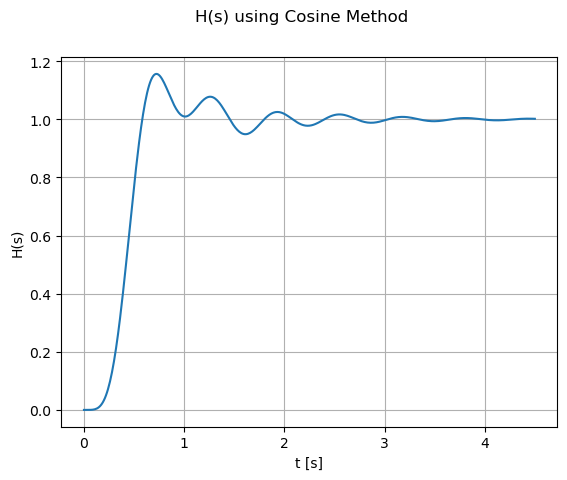

In [48]:
# Insert code calling the cosine method and plotting the response here
#initialize steps and time-domain variables
steps = 1e-2
t = np.arange(0, 4.5+steps, steps)

#call cosine method
yout = cosineMethod(res, pol, t)

#plot cosine method
plt.figure()
plt.plot(t, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("H(s) using Cosine Method")
plt.show()

3. Using $H(s)$ from **Part 2, Task 1**, check your response from **Part 2, Task 2** using **scipy.signal.step()** and plot the results. *Note: Again, the den array used in **scipy.signal.step()** will **not** be the same as the one used in **scipy.signal.residue()** in **Part 2, Task 1**.*

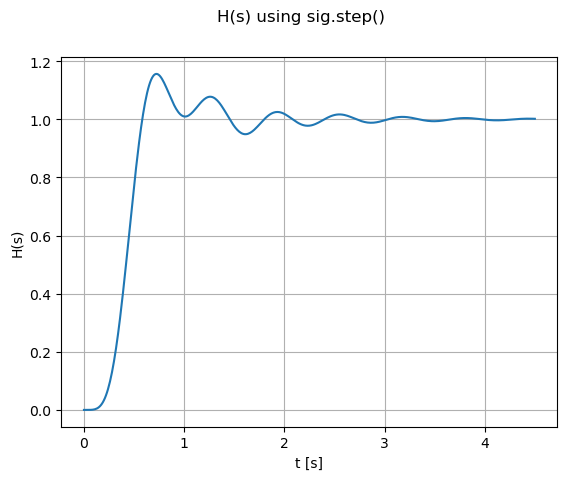

In [56]:
# Insert code creating and plotting the step response using scipy.signal.step() here
#from Part 2 Task 2:
steps = 1e-2
t = np.arange(0, 4.5+steps, steps)
#create the H(s) parts numerator (num) and denominator (den) from new H(s)
num = [25250]
den = [1, 18, 218, 2036, 9085, 25250]
tout, yout = sig.step((num, den), T = t)
#plot sig.step
plt.figure()
plt.plot(tout, yout, label='this label')
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("H(s) using sig.step()")
plt.show()

### 5. Questions
1. For a non-complex pole-residue term, you can still use the cosine method, explain why this works.  
>You can still use the cosine method for a non-complex pole-residue term because the angle variable would be 0. The cosine still works since the angle isn't going to make the entire function zero. This is also the case with the omega values. Since cos(0) = 1, the function is still viable.  
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>no feedback :\)